# SQL Clustering task:
- database info:
    - username: task_reader
    - password: DEsqluser3377#
    - server name: raisadb.database.windows.net
    - database name: raisatask
    - database engine: SQL Server (Azure SQL)

## Spacial Data Formats
__WKT:__ Human readable
- Well-known text (wkt) is a human-readable format that is easy to understand and can be easily parsed by software.
- many GIS software tools and applications support WKT format
- example: point (-122.4194 37.7749) where x is lon and y is lat
- not a geometry object doesnt work with STDistance

__WKB:__ Efficient storage size and query speed
- Well-Known Binary (WKB) can be more efficient than storing it in hexa format.
- binary formats can be easily parsed and processed by software, which can improve performance when working with large datasets.
- example: 0101000000000000000000F03F0000000000000040E6D699999999D93F


__Hex-Encoded WKB string__: Relativly human readable and relativly effieciant in storage size and speed
- represents a point in the Well-Known Binary (WKB) format.
- It consists of a sequence of bytes that represents the point as a binary object.
- example: 0xE6100000010C08DDB0D07BAD43403017DC020E1E5AC0
- geometry object works with geospacial functions like STDistance

## Gemoetry Vs Geography Coordinates:
- Geography:
    - takes the earth curveture into account
    - can measure geograpical data accuratly
- Geometry:
    - distance caluclation are accurate on flat surfaces only (doesn't account for curveture)
    - can be used to represent shapes
    
__spacial referance system identifer (SRID):__ is a numerical code that identifies a specific spatial reference system, which includes information about the earth's shape, its orientation in space, and the units of measurement used to represent geographic data. For example, the SRID 4326 is commonly used to represent geographic data using the WGS 84 geographic coordinate system, which is a standard coordinate system used by GPS and other global navigation systems.

## Data Exploration
- check the data type: 
    - id: primary key
    - shape: Hex-Encoded WKB string

- vizulize on a map
    - conver the data into wkt: [function referance link](https://learn.microsoft.com/en-us/sql/t-sql/spatial-geometry/stastext-geometry-data-type?view=sql-server-ver16)
```sql
SELECT
    id,
    shape.STAsText()
FROM [dbo].[input_points];
```
    - export as xlsx to visulize on(tableau/power bi/ plotly express)


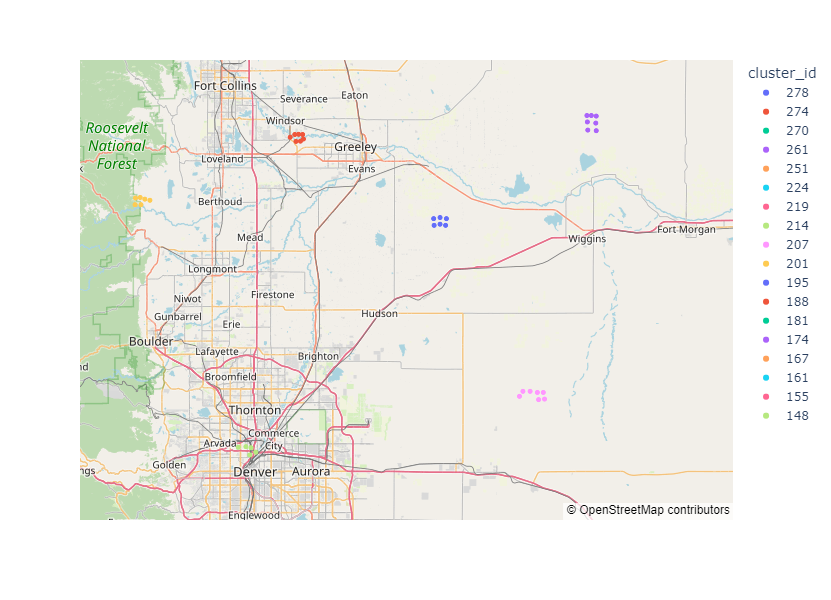

In [61]:
import pandas as pd
import plotly.express as px
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

results = 'C:/Users/Mohimen/Desktop/de2023Internship/sql_task_2/data/results.xlsx'

df = pd.read_excel(results)

df[[ 'del', 'lon', 'lat']] = (df['shape']
             .str.replace('POINT','')
             .str.replace('(','')
             .str.replace(')','')
             .str.split(' ', expand = True))

df = df[['id', 'lon', 'lat', 'cluster_id']]
df['cluster_id'] = df.cluster_id.astype('str')
df['lon'] = df.lon.astype('float')
df['lat'] = df.lat.astype('float')

fig = px.scatter_mapbox(
    data_frame= df,
    lat='lat',
    lon='lon',
    width=600,  # Width of map
    height=600,  # Height of map
    color = 'cluster_id'
    #hover_data=["y1"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

## Clustring Query

- convert from geometry to geography? what is the draw back of using geography its more accurate!